In [119]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [120]:
img = cv2.imread('OpenCV_Logo.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

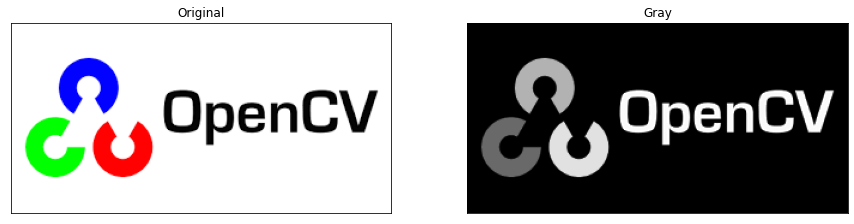

In [121]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [122]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

In [123]:
contours, hierarchy = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [124]:
imgcontour = cv2.drawContours(img, contours, -1, (255, 15, 255), 2)
img = cv2.imread('OpenCV_Logo.jpg')

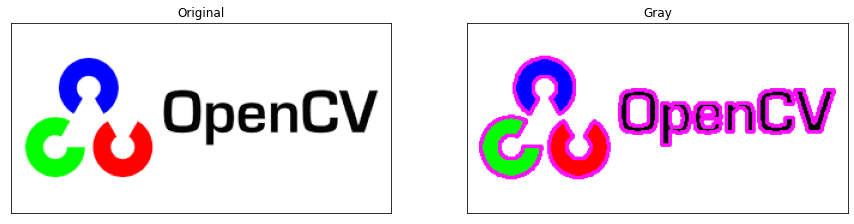

In [125]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [133]:
cnt = contours[1]
epsilon = 0.0001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [134]:
imgcontour = cv2.imread('OpenCV_Logo.jpg')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('OpenCV_Logo.jpg')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('OpenCV_Logo.jpg')

In [135]:
cnt.shape, approx.shape

((106, 1, 2), (106, 1, 2))

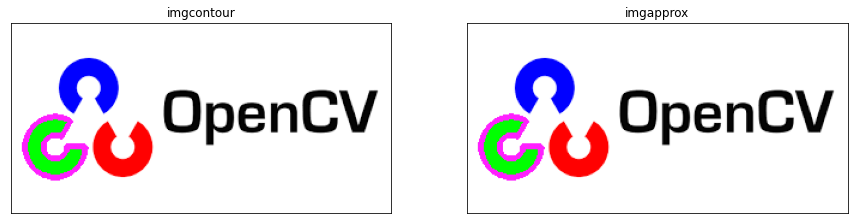

In [136]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [137]:
hull = cv2.convexHull(approx)

In [138]:
imghull = cv2.imread('OpenCV_Logo.jpg')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

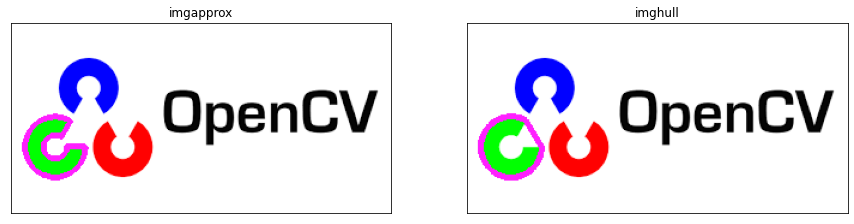

In [139]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [142]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('OpenCV_Logo.jpg')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

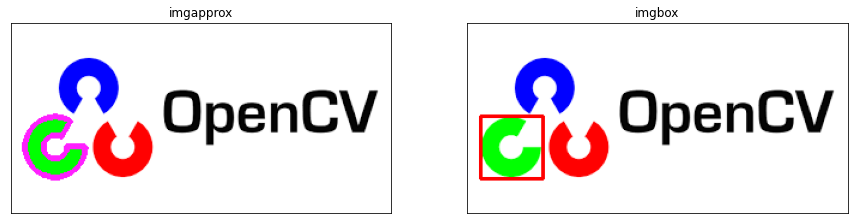

In [143]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [144]:
mgcontour = cv2.imread('opencv_logo.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

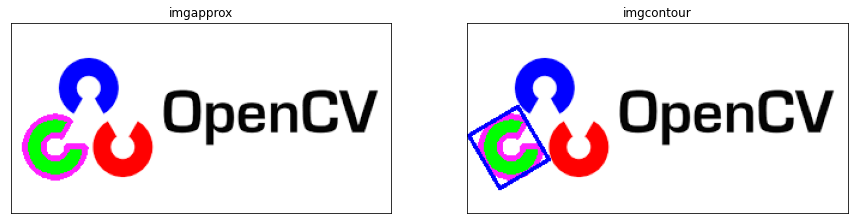

In [145]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [146]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 996.0, 'm10': 141992.0, 'm01': 73632.0, 'm20': 20312333.333333332, 'm11': 10496750.833333332, 'm02': 5535003.666666666, 'm30': 2915627052.0, 'm21': 1501535512.8333333, 'm12': 789023241.1666666, 'm03': 422725580.0, 'mu20': 69634.47389557958, 'mu11': -392.6847389563918, 'mu02': 91558.46184738912, 'mu30': 635.2314972877502, 'mu21': 3171.65151407104, 'mu12': -1269.1866822578013, 'mu03': -1985.5717809796333, 'nu20': 0.07019491005747847, 'nu11': -0.00039584516676786636, 'nu02': 0.09229534790506312, 'nu30': 2.029007619474995e-05, 'nu21': 0.0001013064546680444, 'nu12': -4.053938540252746e-05, 'nu03': -6.342160755289585e-05}


In [147]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [148]:
area = cv2.contourArea(cnt)

In [149]:
perimeter = cv2.arcLength(cnt,True)

In [152]:
imginfo = cv2.imread('OpenCV_Logo.jpg')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

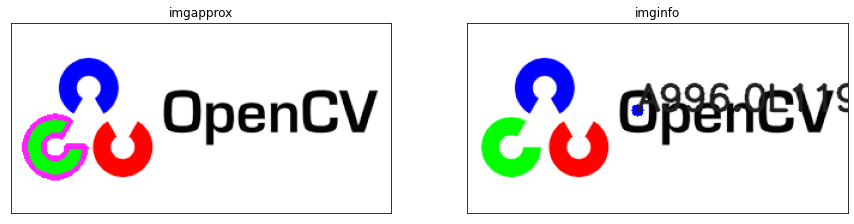

In [153]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()